In [ ]:
... # these dots mean the code segement is not executable 
# prepare dataset
data = ...
# define transform
lda = LinearDiscriminantAnalysis()
# prepare transform on dataset
lda.fit(data)
# apply transform to dataset
transformed = lda.transform(data)

In [ ]:
...
# define the pipeline
steps = [('lda', LinearDiscriminantAnalysis()), ('m', GaussianNB())]
model = Pipeline(steps=steps)

In [ ]:
...
# define the pipeline
steps = [('s', StandardScaler()), ('lda', LinearDiscriminantAnalysis()), ('m',
GaussianNB())]
model = Pipeline(steps=steps)

In [1]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=7, n_classes=10)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [2]:
# evaluate lda with naive bayes algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
 random_state=7, n_classes=10)
# define the pipeline
steps = [('lda', LinearDiscriminantAnalysis(n_components=5)), ('m', GaussianNB())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.314 (0.049)


>1 0.182 (0.032)
>2 0.235 (0.036)
>3 0.267 (0.038)
>4 0.303 (0.037)
>5 0.314 (0.049)
>6 0.314 (0.040)
>7 0.329 (0.042)
>8 0.343 (0.045)
>9 0.358 (0.056)


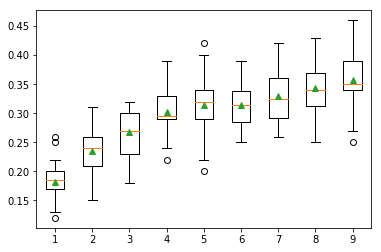

In [4]:
# compare lda number of components with naive bayes algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7, n_classes=10)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,10):
		steps = [('lda', LinearDiscriminantAnalysis(n_components=i)), ('m', GaussianNB())]
		models[str(i)] = Pipeline(steps=steps)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [5]:
# make predictions using lda with naive bayes
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7, n_classes=10)
# define the model
steps = [('lda', LinearDiscriminantAnalysis(n_components=9)), ('m', GaussianNB())]
model = Pipeline(steps=steps)
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[2.3548775,-1.69674567,1.6193882,-1.19668862,-2.85422348,-2.00998376,16.56128782,2.57257575,9.93779782,0.43415008,6.08274911,2.12689336,1.70100279,3.32160983,13.02048541,-3.05034488,2.06346747,-3.33390362,2.45147541,-1.23455205]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 6


In [ ]:
..
data = ...
# define transform
pca = PCA()
# prepare transform on dataset
pca.fit(data)
# apply transform to dataset
transformed = pca.transform(data)

In [ ]:
...
# define the pipeline
steps = [('pca', PCA()), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

In [ ]:
...
# define the pipeline
steps = [('norm', MinMaxScaler()), ('pca', PCA()), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

In [6]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [7]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the pipeline
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.816 (0.034)


>1 0.542 (0.048)
>2 0.713 (0.048)
>3 0.720 (0.053)
>4 0.723 (0.051)
>5 0.725 (0.052)
>6 0.730 (0.046)
>7 0.805 (0.036)
>8 0.800 (0.037)
>9 0.814 (0.036)
>10 0.816 (0.034)
>11 0.819 (0.035)
>12 0.819 (0.038)
>13 0.819 (0.035)
>14 0.853 (0.029)
>15 0.865 (0.027)
>16 0.865 (0.027)
>17 0.865 (0.027)
>18 0.865 (0.027)
>19 0.865 (0.027)
>20 0.865 (0.027)


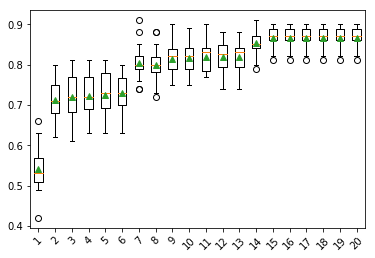

In [8]:
# compare pca number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,21):
		steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
		models[str(i)] = Pipeline(steps=steps)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()